In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("../../data/Dataset3/data.csv")

In [3]:
df.head()

,id,country_id,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,...,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA
0,1,1,1,2008/2009,1,1,1.73,3.40,5.00,1.75,...,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN
1,2,1,1,2008/2009,0,0,1.95,3.20,3.60,1.80,...,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN
2,3,1,1,2008/2009,0,3,2.38,3.30,2.75,2.40,...,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN
3,4,1,1,2008/2009,5,0,1.44,3.75,7.50,1.40,...,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN
4,5,1,1,2008/2009,1,3,5.00,3.50,1.65,5.00,...,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN


## Bet365

In [4]:
df365 = df[["id", "country_id", "league_id", "season", "home_team_goal", "away_team_goal", "B365H", "B365D", "B365A"]]

In [5]:
df365.head()

,id,country_id,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A
0,1,1,1,2008/2009,1,1,1.73,3.40,5.00
1,2,1,1,2008/2009,0,0,1.95,3.20,3.60
2,3,1,1,2008/2009,0,3,2.38,3.30,2.75
3,4,1,1,2008/2009,5,0,1.44,3.75,7.50
4,5,1,1,2008/2009,1,3,5.00,3.50,1.65


In [6]:
df365.isna().sum()

id                   0
country_id           0
league_id            0
season               0
home_team_goal       0
away_team_goal       0
B365H             3387
B365D             3387
B365A             3387
dtype: int64

In [7]:
len(df365)

25979

In [8]:
df365.isna().sum() / len(df365)

id                0.000000
country_id        0.000000
league_id         0.000000
season            0.000000
home_team_goal    0.000000
away_team_goal    0.000000
B365H             0.130375
B365D             0.130375
B365A             0.130375
dtype: float64

In [9]:
def print_missing(row):
    if pd.isna(row["B365H"]):
        return row["country_id"]

In [10]:
missing_countries = df365.apply(print_missing, axis=1)

In [11]:
missing_countries.dropna().value_counts()

15722.0    1920
24558.0    1422
1.0          22
17642.0       8
10257.0       6
4769.0        4
13274.0       3
7809.0        1
21518.0       1
dtype: int64

In [12]:
df365["country_id"].value_counts()

21518    3040
4769     3040
1729     3040
10257    3017
13274    2448
7809     2448
17642    2052
15722    1920
19694    1824
1        1728
24558    1422
Name: country_id, dtype: int64

In [13]:
df365 = df365.dropna(subset=["B365H"])

In [14]:
df365.head()

,id,country_id,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A
0,1,1,1,2008/2009,1,1,1.73,3.40,5.00
1,2,1,1,2008/2009,0,0,1.95,3.20,3.60
2,3,1,1,2008/2009,0,3,2.38,3.30,2.75
3,4,1,1,2008/2009,5,0,1.44,3.75,7.50
4,5,1,1,2008/2009,1,3,5.00,3.50,1.65


In [15]:
def determine_final_result(row):
    hg = int(row["home_team_goal"])
    ag = int(row["away_team_goal"])
    if hg > ag:
        row["result"] = "1"
    elif hg == ag:
        row["result"] = "x"
    else:
        row["result"] = "2"
    return row

In [16]:
df365 = df365.apply(determine_final_result, axis = 1)

In [17]:
df365.head()

,id,country_id,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,result
0,1,1,1,2008/2009,1,1,1.73,3.40,5.00,x
1,2,1,1,2008/2009,0,0,1.95,3.20,3.60,x
2,3,1,1,2008/2009,0,3,2.38,3.30,2.75,2
3,4,1,1,2008/2009,5,0,1.44,3.75,7.50,1
4,5,1,1,2008/2009,1,3,5.00,3.50,1.65,2


In [18]:
def determine_bookie_prediction(row):
    h = row["B365H"]
    d = row["B365D"]
    a = row["B365A"]
    
    if h == min([h, d, a]):
        row["prediction"] = "1"
        row["prediction_performance"] = h
    elif d == min([h, d, a]):
        row["prediction"] = "x"
        row["prediction_performance"] = d
    else:
        row["prediction"] = "2"
        row["prediction_performance"] = a
    return row

In [19]:
df365 = df365.apply(determine_bookie_prediction, axis = 1)

In [20]:
def determine_correct_prediction(row):
    row["correct"] = (row["result"] == row["prediction"])
    return row

In [21]:
df365 = df365.apply(determine_correct_prediction, axis = 1)

In [22]:
df365.head()

,id,country_id,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,result,prediction,prediction_performance,correct
0,1,1,1,2008/2009,1,1,1.73,3.40,5.00,x,1,1.73,False
1,2,1,1,2008/2009,0,0,1.95,3.20,3.60,x,1,1.95,False
2,3,1,1,2008/2009,0,3,2.38,3.30,2.75,2,1,2.38,False
3,4,1,1,2008/2009,5,0,1.44,3.75,7.50,1,1,1.44,True
4,5,1,1,2008/2009,1,3,5.00,3.50,1.65,2,2,1.65,True


In [23]:
grouped365 = df365.groupby(["country_id", "season"])

In [24]:
grouped365.size()

country_id  season   
1           2008/2009    303
            2009/2010    210
            2010/2011    240
            2011/2012    238
            2012/2013    235
                        ... 
21518       2011/2012    380
            2012/2013    380
            2013/2014    380
            2014/2015    380
            2015/2016    380
Length: 71, dtype: int64

In [25]:
grouped365.get_group((1, '2008/2009'))

,id,country_id,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,result,prediction,prediction_performance,correct
0,1,1,1,2008/2009,1,1,1.73,3.40,5.00,x,1,1.73,False
1,2,1,1,2008/2009,0,0,1.95,3.20,3.60,x,1,1.95,False
2,3,1,1,2008/2009,0,3,2.38,3.30,2.75,2,1,2.38,False
3,4,1,1,2008/2009,5,0,1.44,3.75,7.50,1,1,1.44,True
4,5,1,1,2008/2009,1,3,5.00,3.50,1.65,2,2,1.65,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,302,1,1,2008/2009,1,2,1.44,4.20,7.50,2,1,1.44,False
302,303,1,1,2008/2009,3,0,2.80,3.30,2.50,1,2,2.50,False
303,304,1,1,2008/2009,0,3,2.75,3.30,2.50,2,2,2.50,True
304,305,1,1,2008/2009,2,2,2.40,3.30,2.90,x,1,2.40,False


In [26]:
test = grouped365.get_group((1, '2008/2009'))

### Follow the bookie strategie

In [27]:
def determine_gain(row):
    amount = 10
    if row["correct"]:
        row["gain"] = row["prediction_performance"] * amount
    else:
        row["gain"] = -amount
    return row

In [31]:
test = test.apply(determine_gain, axis = 1)

In [34]:
test.head()

,id,country_id,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,result,prediction,prediction_performance,correct,gain
0,1,1,1,2008/2009,1,1,1.73,3.40,5.00,x,1,1.73,False,-10.0
1,2,1,1,2008/2009,0,0,1.95,3.20,3.60,x,1,1.95,False,-10.0
2,3,1,1,2008/2009,0,3,2.38,3.30,2.75,2,1,2.38,False,-10.0
3,4,1,1,2008/2009,5,0,1.44,3.75,7.50,1,1,1.44,True,14.4
4,5,1,1,2008/2009,1,3,5.00,3.50,1.65,2,2,1.65,True,16.5


In [32]:
final_gain = test["gain"].sum()

Text(0, 0.5, 'gains ($)')

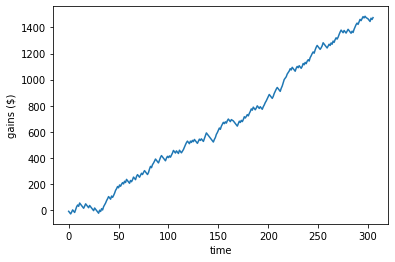

In [44]:
ax = test["gain"].cumsum().plot()
ax.set_xlabel("time")
ax.set_ylabel("gains ($)")

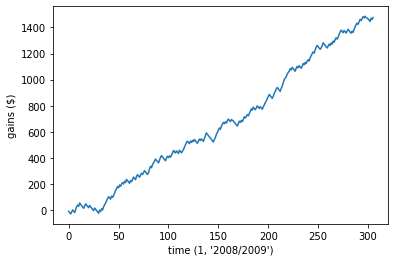

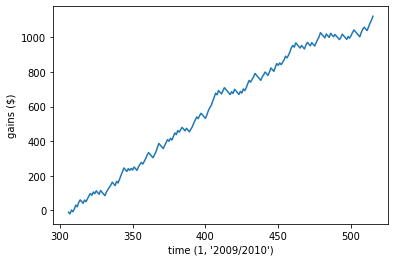

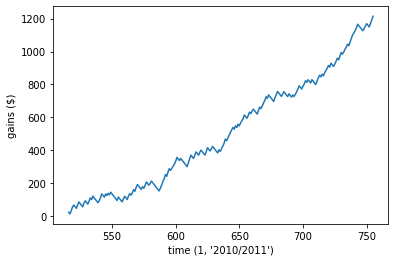

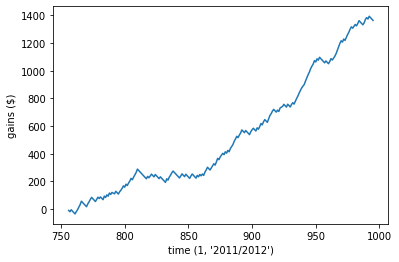

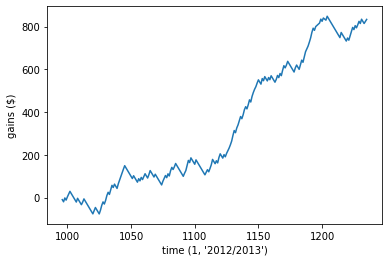

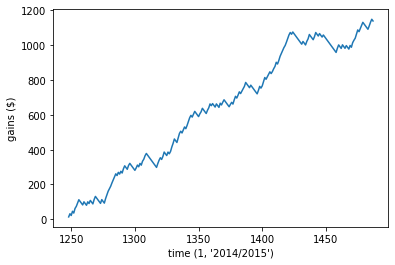

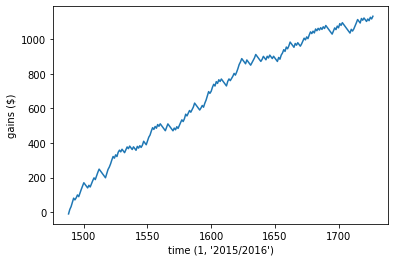

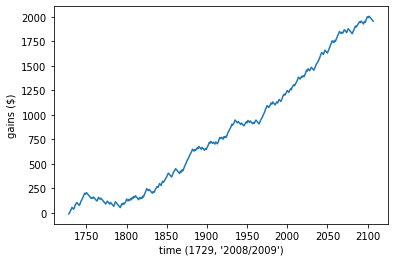

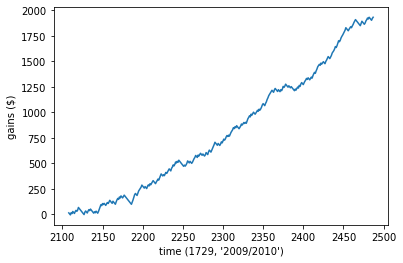

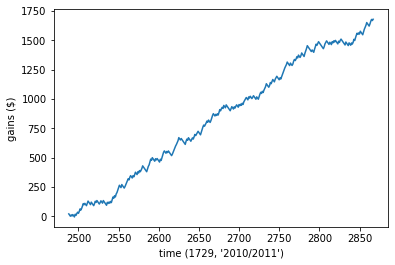

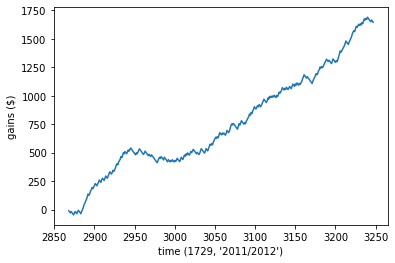

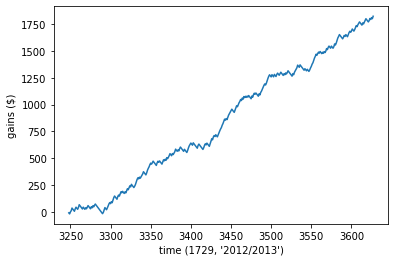

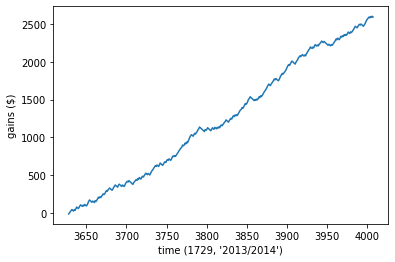

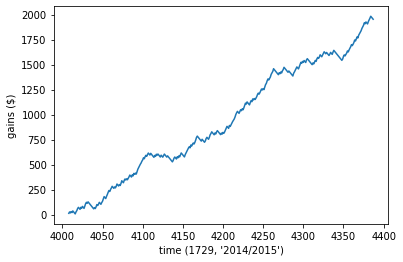

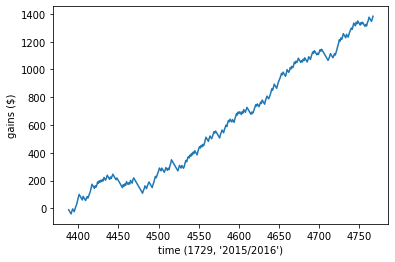

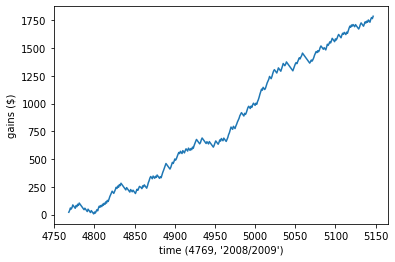

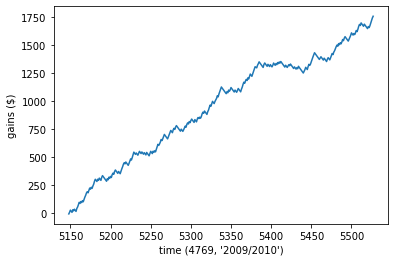

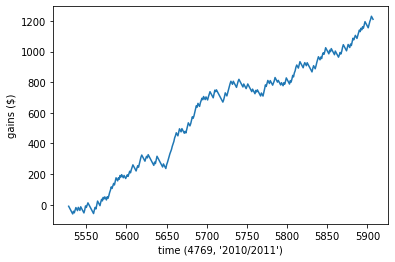

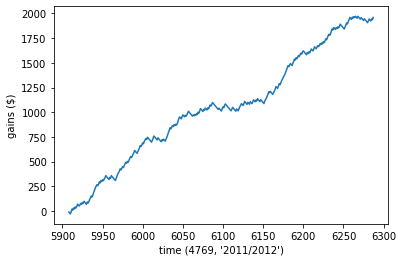

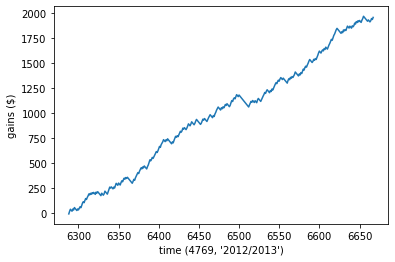

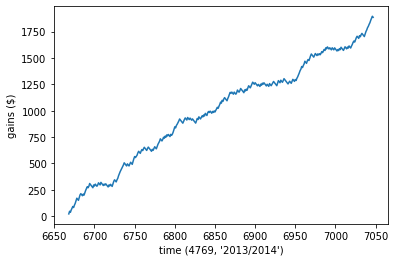

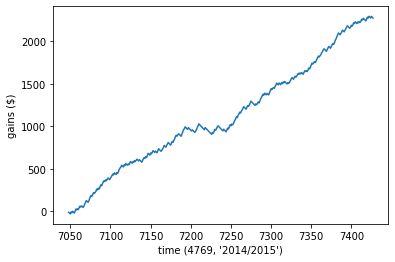

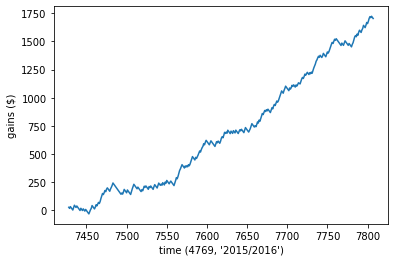

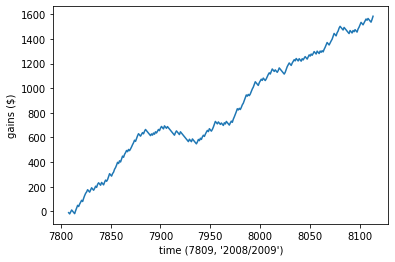

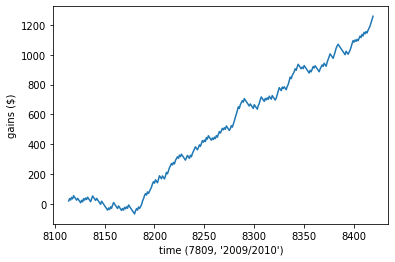

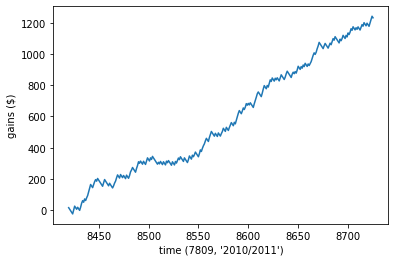

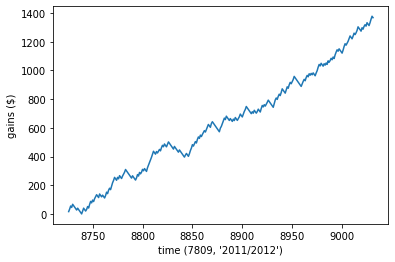

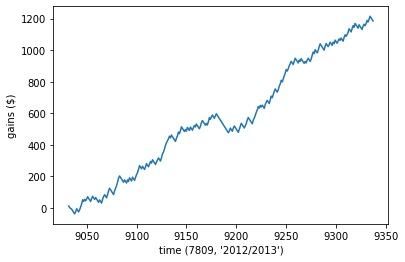

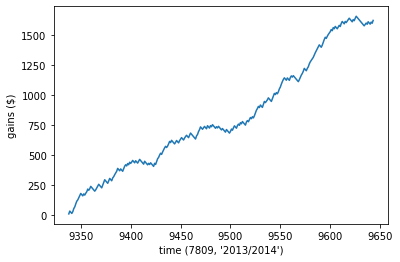

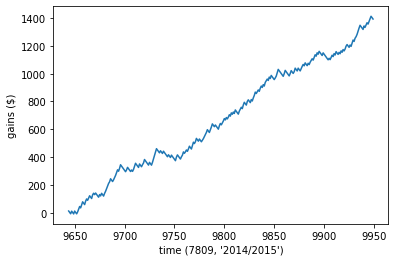

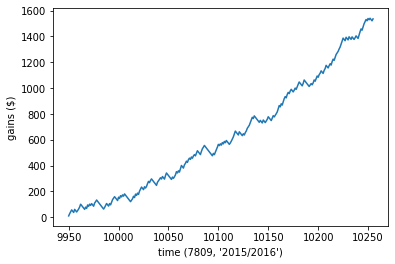

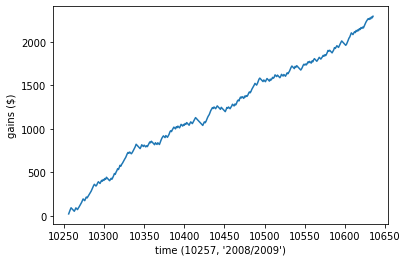

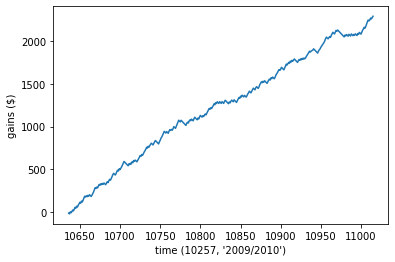

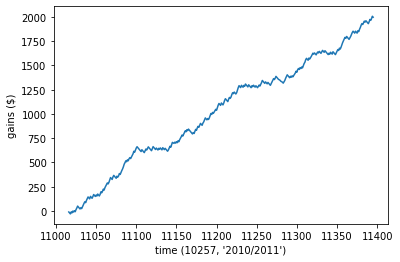

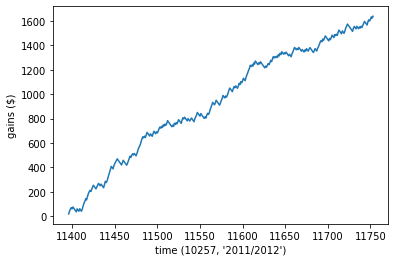

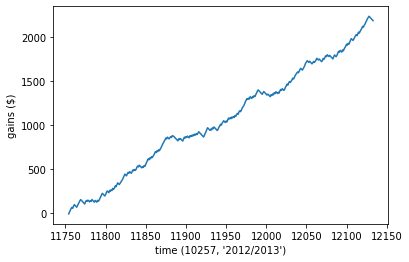

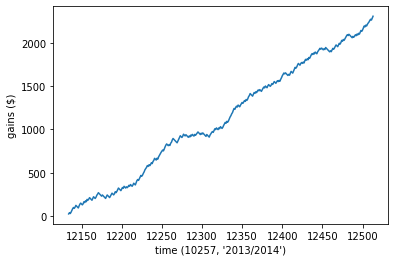

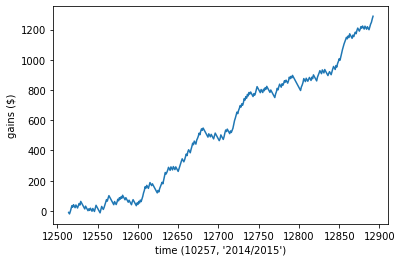

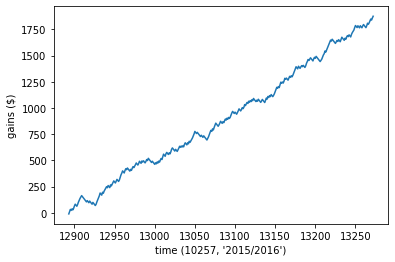

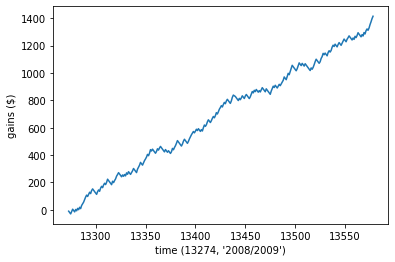

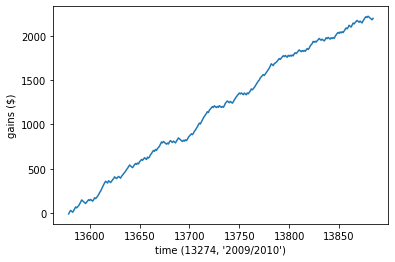

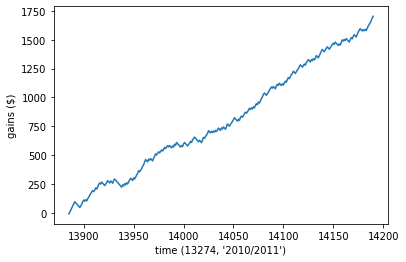

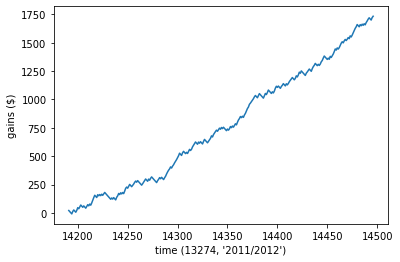

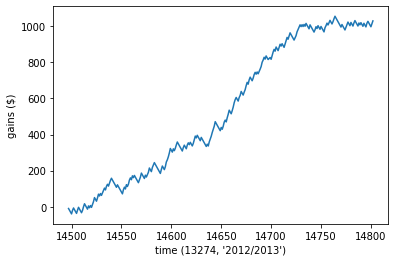

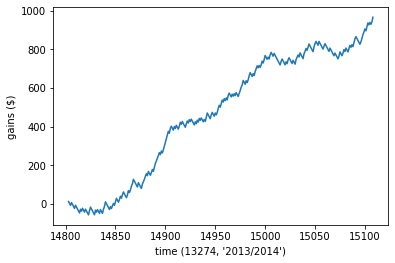

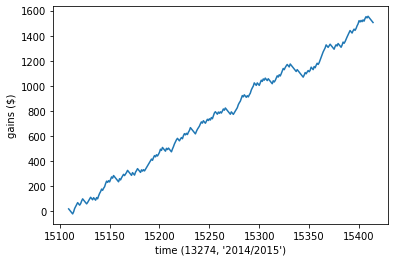

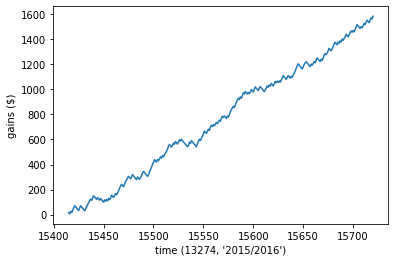

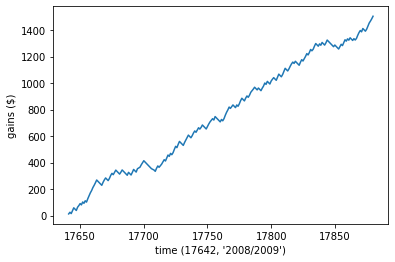

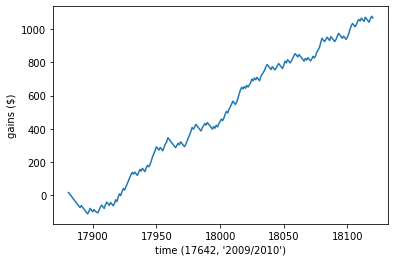

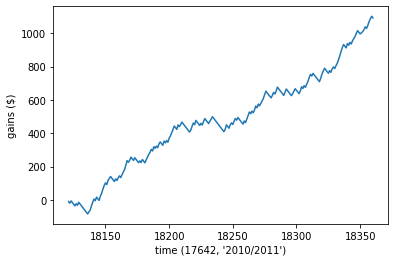

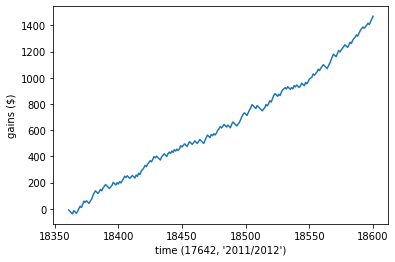

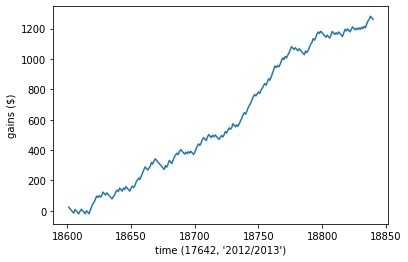

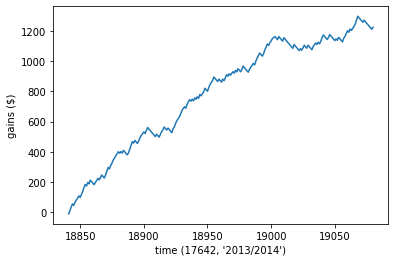

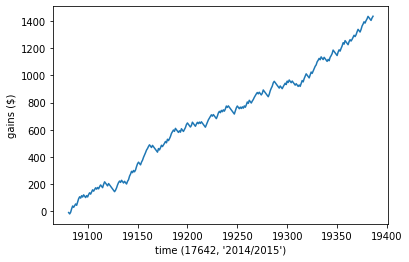

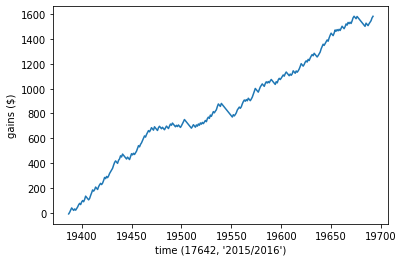

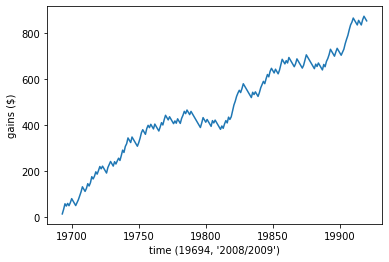

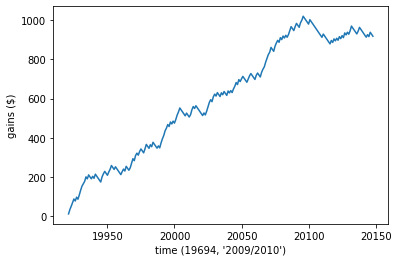

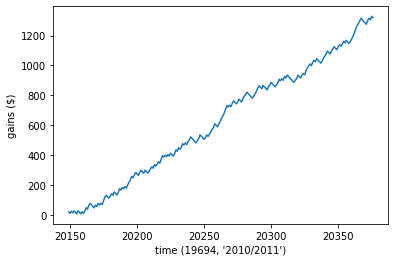

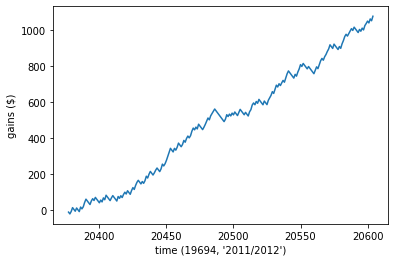

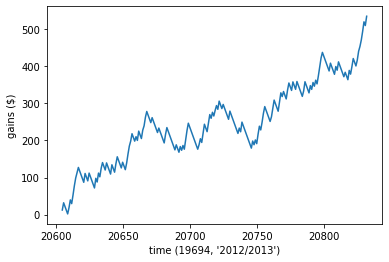

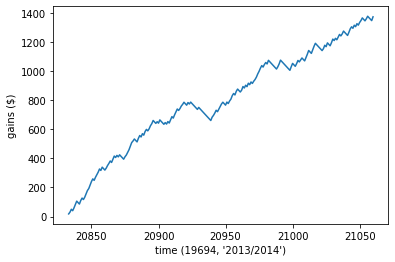

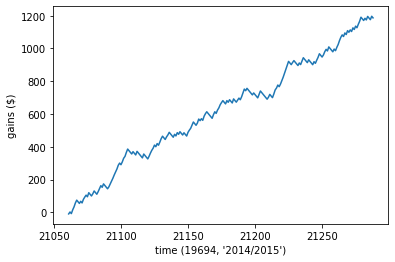

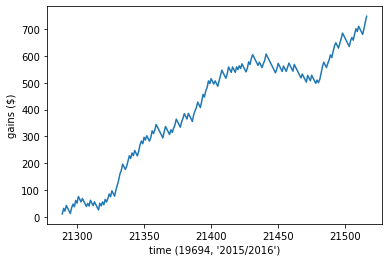

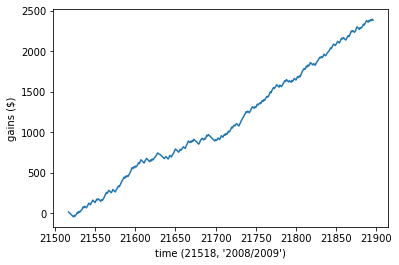

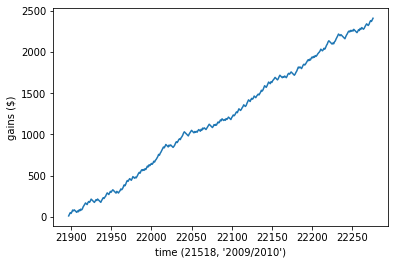

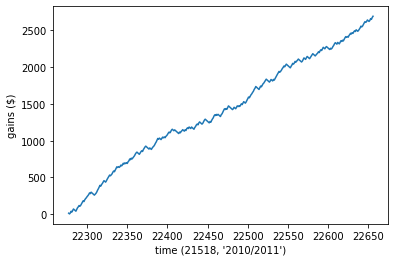

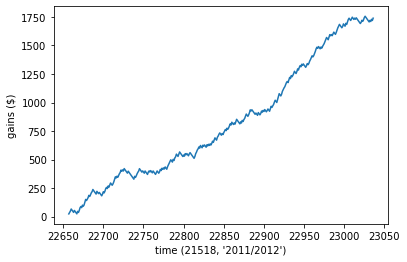

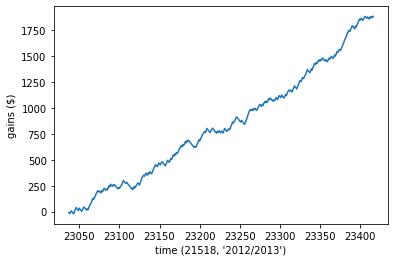

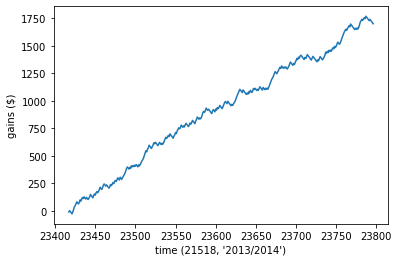

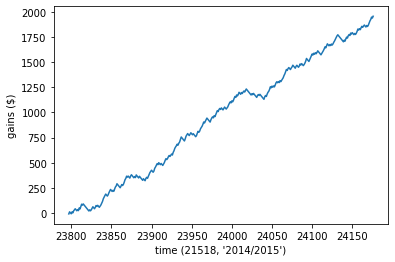

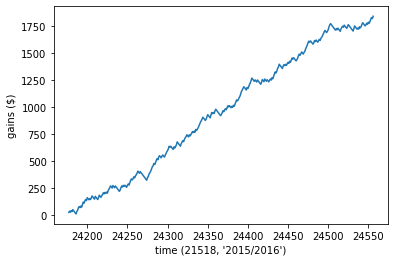

In [48]:
for name, group in grouped365:
    current = group.apply(determine_gain, axis = 1)
    final_gain = current["gain"].sum()
    current["gain"].cumsum().plot()
    plt.xlabel("time {}".format(name))
    plt.ylabel("gains ($)")
    plt.show()